In [13]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
import pandas as pd
# load the dataset
df2 = pd.read_csv("/content/test1.csv")
df1 = pd.read_csv("/content/train.csv")
 
# retrieve the array
data1 = df1[[ 'actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3']]
data2 = df2[[ 'actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3']]
# split into input and output elements
data1 = data1.values
data2 = data2.values
X_train, y_train = data1[:, :-1], data1[:, -1]
# split into input and output elements
X_test, y_test = data2[:, :-1], data2[:, -1]
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
 


(200000, 31) (50000, 31) (200000,) (50000,)
MAE: 2644.324


In [23]:
# identify outliers in the training dataset
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
yhat

array([ 1,  1,  1, ..., -1, -1, -1])

In [24]:
yhat2 = iso.fit_predict(X_test)
yhat2

array([-1, -1, -1, ...,  1,  1,  1])

In [25]:
y_test

array([377.06, 377.06, 377.12, ..., 414.09, 414.09, 414.09])

In [20]:
mask = yhat2 != -1
X_test, y_test = X_test[mask, :], y_test[mask]

In [28]:
y_test

array([377.06, 377.06, 377.12, ..., 414.09, 414.09, 414.09])

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [16]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [12]:

# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = pd.read_csv("/content/test1.csv")
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
  

(50000, 36) (50000,)
(33500, 36) (16500, 36) (33500,) (16500,)


ValueError: ignored

In [10]:

# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# retrieve the array
data = df[[ 'actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3']]
# split into input and output elements
data = data.values
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
 

MAE: 0.166


In [29]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [43]:
folder = r'/content'
data_dir = folder+'/2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
merged_data.reset_index(inplace=True)  # reset index to get datetime as columns
merged_data.columns = ['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'] # rename columns
merged_data.sort_values(by='actc2',inplace=True)
merged_data.to_csv('2nd_test_resmaple_10minutes.csv')

train.csv


TypeError: ignored

In [32]:
merged_data = pd.read_csv('test1.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
#merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
print(merged_data.head())

          dbtm  dbtv     dmea     dver  ...   gasa   spr1     spr2    spr3
actc2                                   ...                               
2      3187.08     0  3187.14  3187.14  ...  26763  41.25  6002.96  377.01
2      3187.08     0  3187.14  3187.14  ...  26689  41.25  5979.17  377.01
2      3187.16     0  3187.17  3187.17  ...  26645  41.25  6002.94  377.01
2      3187.16     0  3187.18  3187.18  ...  26557  41.25  5979.28  377.05
2      3187.14     0  3187.18  3187.18  ...  26483  41.25  6010.99  377.05

[5 rows x 31 columns]


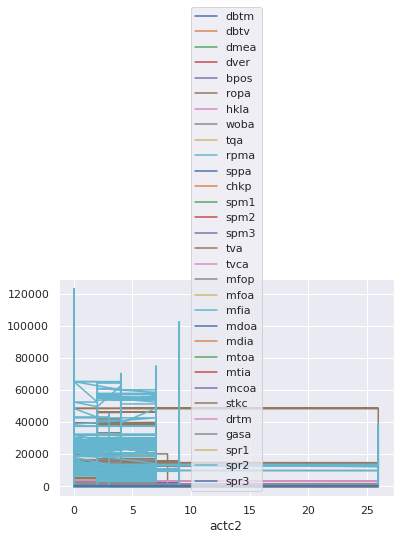

In [33]:
merged_data.plot()

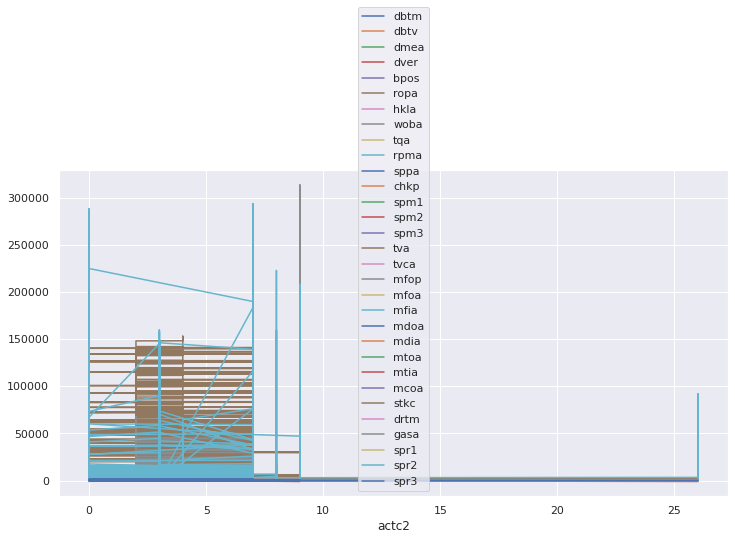

In [47]:
merged_data1 = pd.read_csv('/content/2nd_test/train.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
merged_data2 = pd.read_csv('/content/2nd_test/test1.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
dataset_train = merged_data1 
dataset_test = merged_data2
dataset_train.plot(figsize = (12,6))

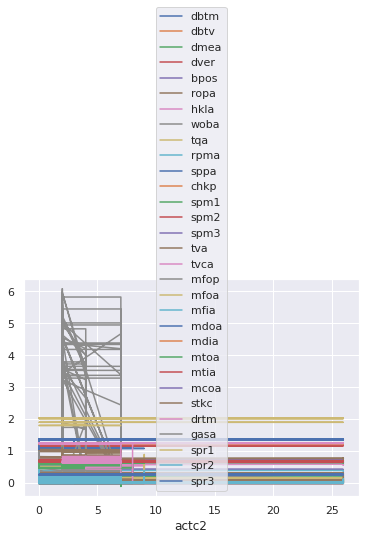

In [48]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                              columns=dataset_train.columns,
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test),
                             columns=dataset_test.columns,
                             index=dataset_test.index)
X_test.plot()

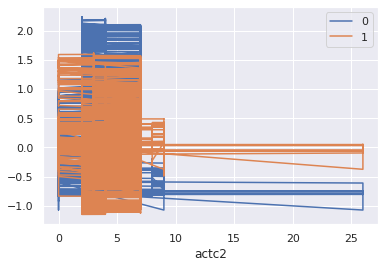

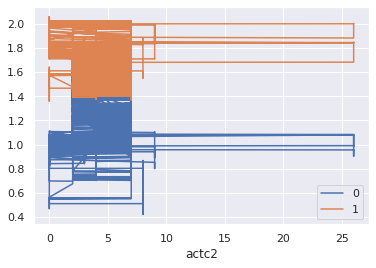

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

X_train_PCA.plot()
X_test_PCA.plot()

In [50]:
def is_pos_def(A):
    if np.allclose(A, A.T): # check if A is Symmetric Matrices
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

def cov_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [51]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [52]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

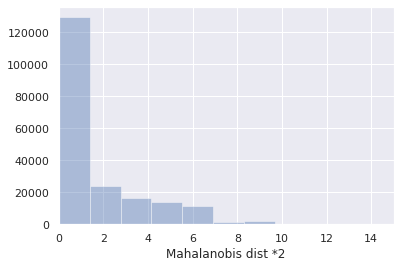

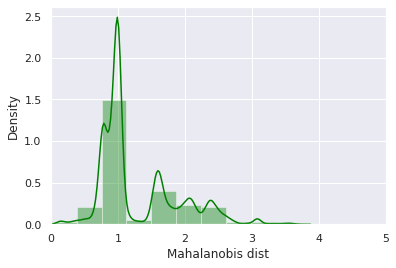

In [53]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10,
             kde= False)
plt.xlim([0.0,15])
plt.xlabel('Mahalanobis dist *2')

plt.figure()
sns.distplot(dist_train,
             bins = 10,
             kde= True,
            color = 'green')
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [54]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
print(anomaly.head())
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

       Mob dist    Thresh  Anomaly
actc2                             
2      3.511012  3.848719    False
2      3.514277  3.848719    False
2      3.516078  3.848719    False
2      3.529692  3.848719    False
2      3.523391  3.848719    False


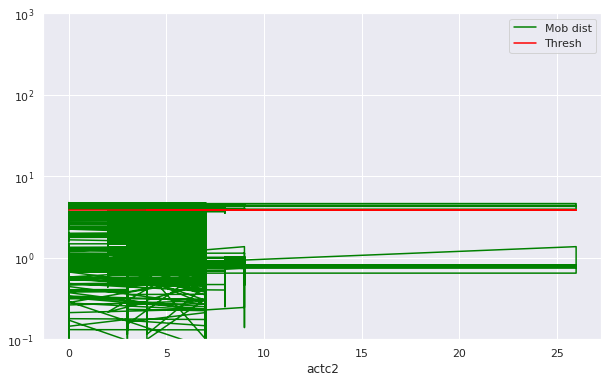

In [55]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])


建立自编码模型

In [64]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Input 
from keras.models import Model 
from keras.layers import Dense 
from tensorflow.keras import regularizers
tf.random.set_seed(10)
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X.
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 31)                341       
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0184 - val_loss: 0.0580
Epoch 2/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0121 - val_loss: 0.0542
Epoch 3/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0090 - val_loss: 0.0452
Epoch 4/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0082 - val_loss: 0.0503
Epoch 5/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0080 - val_loss: 0.0534
Epoch 6/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0078 - val_loss: 0.0524
Epoch 7/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0076 - val_loss: 0.0471
Epoch 8/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0074 - val_loss: 0.0451
Epoch 9/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0073 - val_loss: 0.0518
Epoch 10/100
19000/19000 [====================

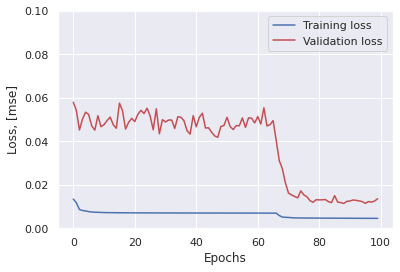

In [65]:
# Train model for 100 epochs, batch size of 10:
NUM_EPOCHS=100
BATCH_SIZE=10


history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE,
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

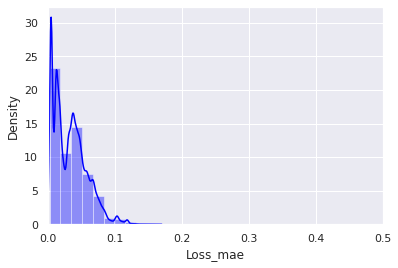

In [66]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred,
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10,
             kde= True,
            color = 'blue')
plt.xlim([0.0,.5])

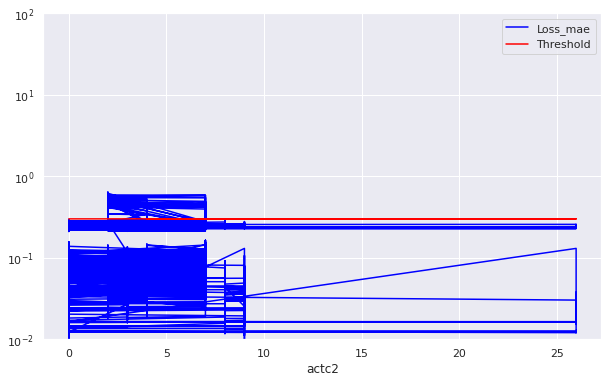

In [67]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred,
                      columns=X_test.columns)
X_pred.index = X_test.index


threshod = 0.3
scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = threshod
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train,
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = threshod
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

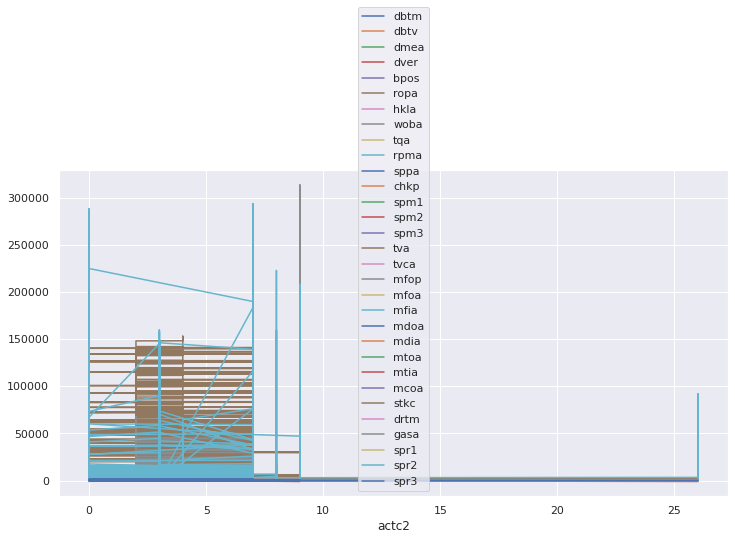

In [68]:
merged_data1 = pd.read_csv('/content/2nd_test/train.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
merged_data2 = pd.read_csv('/content/2nd_test/test2.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
dataset_train = merged_data1 
dataset_test = merged_data2
dataset_train.plot(figsize = (12,6))

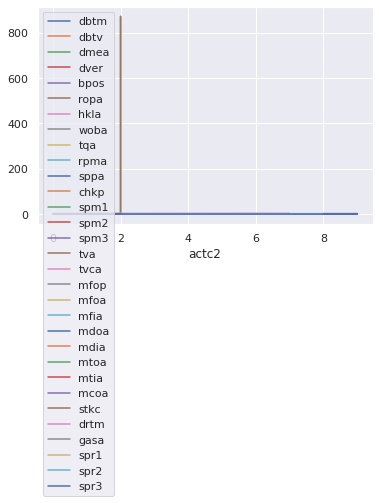

In [69]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                              columns=dataset_train.columns,
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test),
                             columns=dataset_test.columns,
                             index=dataset_test.index)
X_test.plot()

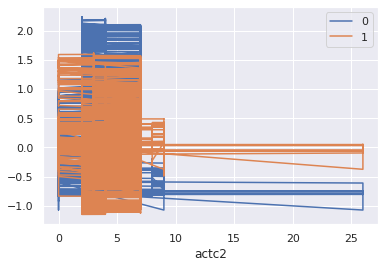

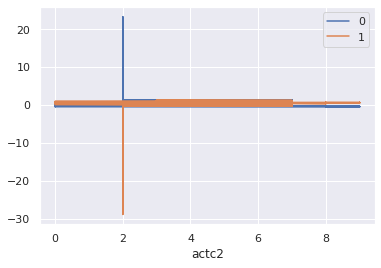

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

X_train_PCA.plot()
X_test_PCA.plot()

In [72]:
def is_pos_def(A):
    if np.allclose(A, A.T): # check if A is Symmetric Matrices
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

def cov_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

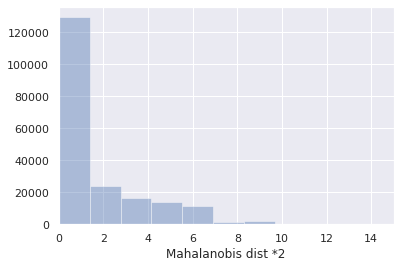

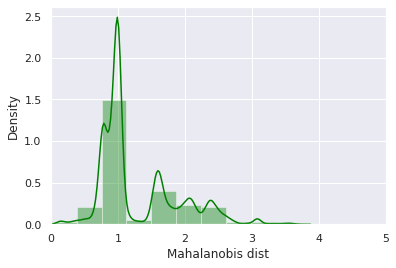

In [73]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10,
             kde= False)
plt.xlim([0.0,15])
plt.xlabel('Mahalanobis dist *2')

plt.figure()
sns.distplot(dist_train,
             bins = 10,
             kde= True,
            color = 'green')
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [74]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
print(anomaly.head())
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance1.csv')

       Mob dist    Thresh  Anomaly
actc2                             
8      1.524575  3.848719    False
8      1.523900  3.848719    False
8      1.524410  3.848719    False
8      1.524477  3.848719    False
8      1.524095  3.848719    False


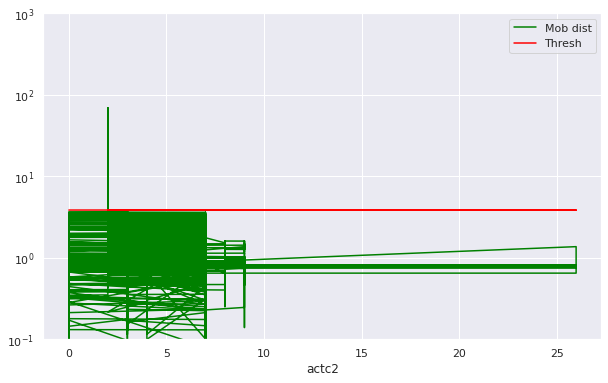

In [75]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])


In [76]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Input 
from keras.models import Model 
from keras.layers import Dense 
from tensorflow.keras import regularizers
tf.random.set_seed(10)
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X.
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 31)                341       
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0184 - val_loss: 0.0580
Epoch 2/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0121 - val_loss: 0.0542
Epoch 3/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0090 - val_loss: 0.0452
Epoch 4/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0082 - val_loss: 0.0503
Epoch 5/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0080 - val_loss: 0.0534
Epoch 6/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0078 - val_loss: 0.0524
Epoch 7/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0076 - val_loss: 0.0471
Epoch 8/100
19000/19000 [==============================] - 29s 2ms/step - loss: 0.0074 - val_loss: 0.0451
Epoch 9/100
19000/19000 [==============================] - 26s 1ms/step - loss: 0.0073 - val_loss: 0.0518
Epoch 10/100
19000/19000 [====================

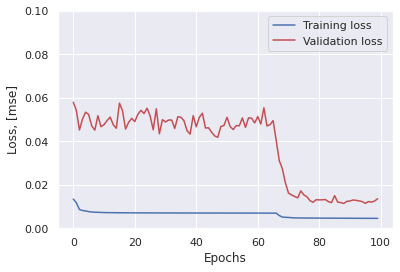

In [77]:
# Train model for 100 epochs, batch size of 10:
NUM_EPOCHS=100
BATCH_SIZE=10


history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE,
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

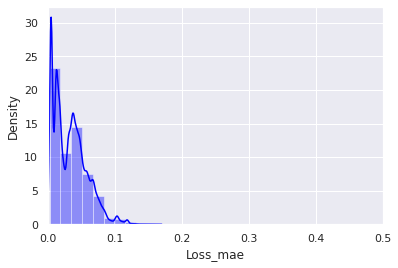

In [78]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred,
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10,
             kde= True,
            color = 'blue')
plt.xlim([0.0,.5])

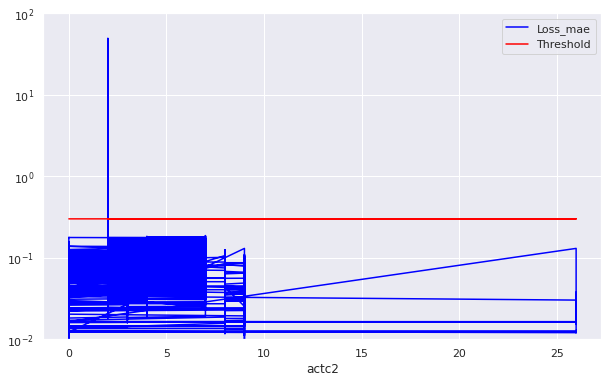

In [79]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred,
                      columns=X_test.columns)
X_pred.index = X_test.index


threshod = 0.3
scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = threshod
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train,
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = threshod
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

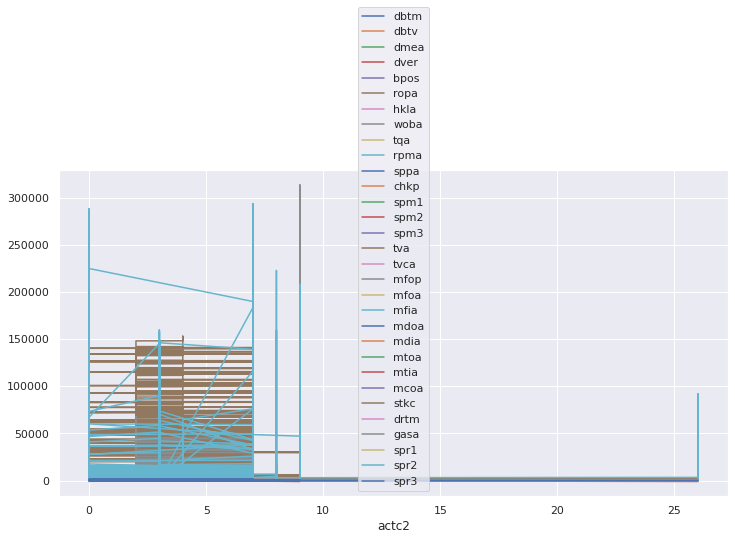

In [80]:
merged_data1 = pd.read_csv('/content/2nd_test/train.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
merged_data2 = pd.read_csv('/content/2nd_test/test3.csv',index_col= 'actc2',usecols=['actc2','dbtm','dbtv','dmea','dver','bpos','ropa','hkla', 	'woba',	'tqa', 	'rpma',	'sppa',	'chkp',	'spm1',	'spm2',	'spm3',	'tva',	'tvca',	'mfop',	'mfoa',	'mfia',	'mdoa',	'mdia',	'mtoa',	'mtia',	'mcoa',	 'stkc',	'drtm',	'gasa',	'spr1',	'spr2',	'spr3'])
dataset_train = merged_data1 
dataset_test = merged_data2
dataset_train.plot(figsize = (12,6))

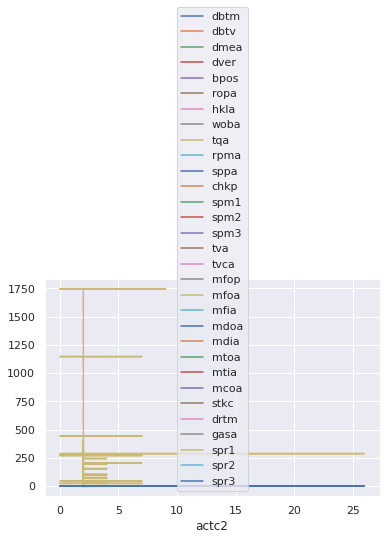

In [81]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                              columns=dataset_train.columns,
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test),
                             columns=dataset_test.columns,
                             index=dataset_test.index)
X_test.plot()

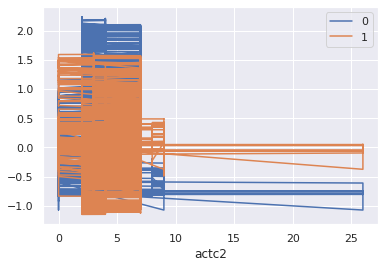

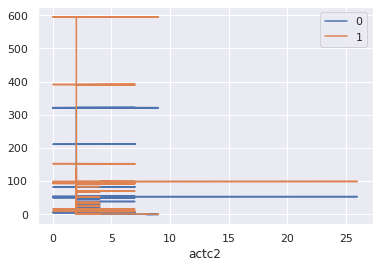

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

X_train_PCA.plot()
X_test_PCA.plot()

In [83]:
def is_pos_def(A):
    if np.allclose(A, A.T): # check if A is Symmetric Matrices
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

def cov_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

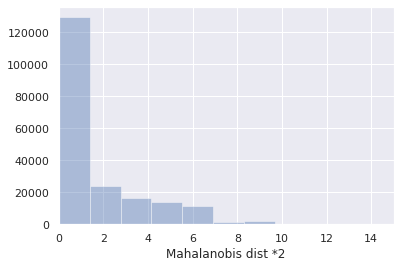

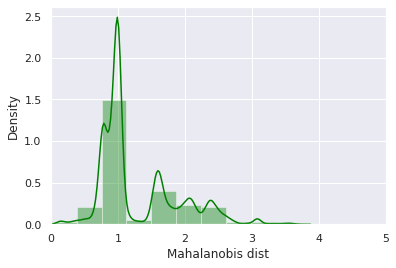

In [84]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10,
             kde= False)
plt.xlim([0.0,15])
plt.xlabel('Mahalanobis dist *2')

plt.figure()
sns.distplot(dist_train,
             bins = 10,
             kde= True,
            color = 'green')
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [85]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
print(anomaly.head())
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance2.csv')

       Mob dist    Thresh  Anomaly
actc2                             
9      1.296485  3.848719    False
9      1.294633  3.848719    False
9      1.298494  3.848719    False
9      1.303135  3.848719    False
9      1.307449  3.848719    False


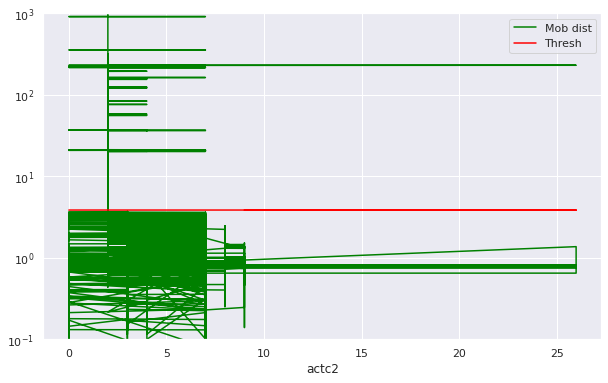

In [86]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

In [87]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Input 
from keras.models import Model 
from keras.layers import Dense 
from tensorflow.keras import regularizers
tf.random.set_seed(10)
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X.
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                320       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 31)                341       
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0184 - val_loss: 0.0580
Epoch 2/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0121 - val_loss: 0.0542
Epoch 3/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0090 - val_loss: 0.0452
Epoch 4/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0082 - val_loss: 0.0503
Epoch 5/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0080 - val_loss: 0.0534
Epoch 6/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0078 - val_loss: 0.0524
Epoch 7/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0076 - val_loss: 0.0471
Epoch 8/100
19000/19000 [==============================] - 27s 1ms/step - loss: 0.0074 - val_loss: 0.0451
Epoch 9/100
19000/19000 [==============================] - 31s 2ms/step - loss: 0.0073 - val_loss: 0.0518
Epoch 10/100
19000/19000 [====================

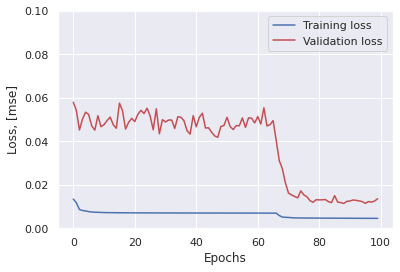

In [88]:
# Train model for 100 epochs, batch size of 10:
NUM_EPOCHS=100
BATCH_SIZE=10


history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE,
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

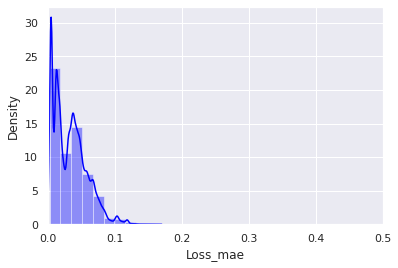

In [89]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred,
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10,
             kde= True,
            color = 'blue')
plt.xlim([0.0,.5])

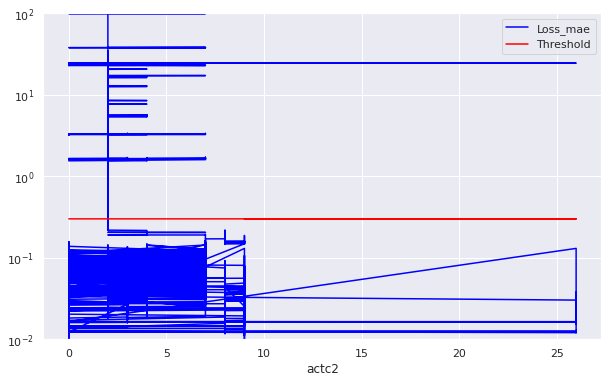

In [90]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred,
                      columns=X_test.columns)
X_pred.index = X_test.index


threshod = 0.3
scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = threshod
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train,
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = threshod
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])